# 실습 과제 #2. 데이터 다루기

> 2023년도 2학기 데이터애널리틱스 (JEO01425-0856)
> <br>2023년 10월 3일 ~ 2023년 10월 16일

- **문제 개요**
<br>서로 다른 세 개의 대학에서 공통으로 운영 중인 강좌 다섯 개를 샘플로 뽑아,
<br>해당 다섯 과목 중 적어도 세 개 이상 들은 학생들을 대상으로 데이터 전처리를 진행하고 각종 통계치를 확인해보고자 한다.
<br>이를 위한 코드를 작성하여라.

- **전체 목차**

1. 필요한 라이브러리를 모두 한 곳에 import 하세요. (5점)

2. 데이터 불러오기 (5점)
    1. 학생 정보 불러오기 (1점)
    2. 과목별 점수 불러오기 (4점)

3. 데이터 전처리 (55점)
    1. 학생 정보 전처리 (10점)
    2. 결측치 및 미응시 처리 (20점)
    3. `df_all` 만들기 (10점)
    4. 과목별 총점 추가 (10점)
    5. 데이터 저장 (5점)

4. 데이터 시각화 (35점)
    1. 학과별 수강 이력 시각화 (10점)
    2. 우수 정도 시각화 (25점)



## 1. 필요한 라이브러리를 모두 여기에 import 하세요. (5점)
- 주의
  - 다른 위치에 import할 경우 각 셀마다 감점


In [52]:
# TODO: 필요 라이브러리 가져오기
import csv
import os

from os.path import *
from google.colab import drive

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from fractions import Fraction

In [53]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [54]:
# !!! 수정 금지 !!!
SCHOOL_LIST = ['A', 'B', 'C']
GRADE_LIST = [1, 2, 3, 4]
MAJOR_LIST = ['산업공학', '컴퓨터공학', '전자공학']
SUBJECT_LIST = ['경제', '글쓰기', '물리', '미적분', '영어', '통계', '프로그래밍']

## 2. 데이터 불러오기 (5점)

### 2.1. 학생 정보 불러오기 (1점)
- 파일명이 'student.csv'인 파일을 'data'폴더로부터 불러와 df_student에 저장하세요.
- 주의
  - 절대경로가 아닌 상대경로를 이용할 것

with open("./student.csv","r") as s:
  df_student = csv.reader(s)
  for row in df_student:
        print(', '.join(row))

In [55]:
# TODO: student.csv 파일 불러오기
df_student = pd.read_csv("data/student.csv")

In [56]:
# !!! 수정 금지 !!!
print(df_student.shape)
df_student.head()

(100, 6)


,학교,학년,학과,과목,ID,성별
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남
1,C,3,전자공학,"['미적분', '프로그래밍', '통계']",id_001,여
2,C,3,산업공학,"['글쓰기', '영어', '미적분', '통계']",id_002,남
3,B,1,전자공학,"['미적분', '글쓰기', '영어', '프로그래밍', '통계']",id_003,여
4,C,1,전자공학,"['미적분', '프로그래밍', '영어', '통계']",id_004,여


In [57]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학교      100 non-null    object
 1   학년      100 non-null    int64 
 2   학과      100 non-null    object
 3   과목      100 non-null    object
 4   ID      100 non-null    object
 5   성별      100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [58]:
df_student['과목'].value_counts()

['프로그래밍', '글쓰기', '통계', '미적분']          3
['프로그래밍', '미적분', '글쓰기', '영어', '통계']    3
['프로그래밍', '미적분', '영어', '통계', '글쓰기']    3
['영어', '글쓰기', '미적분', '프로그래밍']          2
['통계', '영어', '프로그래밍', '글쓰기']           2
                                      ..
['글쓰기', '미적분', '프로그래밍']                1
['미적분', '프로그래밍', '통계', '글쓰기', '영어']    1
['미적분', '글쓰기', '영어', '통계']             1
['글쓰기', '통계', '영어']                    1
['통계', '미적분', '영어', '프로그래밍']           1
Name: 과목, Length: 81, dtype: int64

In [59]:
df_student['학과'].value_counts()

전자공학     36
산업공학     33
컴퓨터공학    31
Name: 학과, dtype: int64

### 2.2. 과목별 점수 불러오기 (4점)
- SUBJECT_LIST에 있는 과목명을 이용하여 각 과목별 점수를 불러와 df_subjects 딕셔너리 안에 과목명을 key로, 데이터프레임을 value로 저장하세요.
  - 즉, `df_subjects['경제']`에는 경제과목의 점수 데이터프레임이 저장되어 있어야 합니다.
  - 파일이 존재하는 경우, successed_subjects 리스트에 해당 과목명을 저장하세요.
  - 파일이 존재하지 않는 경우(FileNotFoundError)에는 무시하고 넘어가도록 예외처리를 하세요.
- 주의
  - 절대경로가 아닌 상대경로를 이용할 것
  - 파일은 'data' 폴더 하위에 '{과목명}.csv' 형태로 저장되어 있습니다.
  - SUBJECT_LIST에 있으나 파일이 존재하지 않는 경우를 수동으로 체크하지 마세요.

In [60]:
SUBJECT_LIST

['경제', '글쓰기', '물리', '미적분', '영어', '통계', '프로그래밍']

In [61]:
df_subjects = {}
successed_subjects = []


# TODO: 파일이 존재하지 않는 경우 예외처리하여 df_subjects에 저장

# SUBJECT_LIST에 있는 과목명을 이용하여
for subject in SUBJECT_LIST:
  file_path = os.path.join('data', f'{subject}.csv')

  try:
    df_subjects[subject] = pd.read_csv(file_path)
    successed_subjects.append(subject)

  except FileNotFoundError:
    print(f"{subject}는 파일이 없음")

경제는 파일이 없음
물리는 파일이 없음


In [62]:
df_subjects

{'글쓰기':         ID  과제1(25)  과제2(30)  과제3(35)  출석(10)
 0   id_003      NaN    29.25    24.96     9.0
 1   id_097      NaN    22.59    25.35     8.0
 2   id_052    13.91    17.19    22.67     6.0
 3   id_027    19.35    -1.00    24.89     7.0
 4   id_044    19.14    24.40    24.20     8.0
 ..     ...      ...      ...      ...     ...
 82  id_059    16.14    27.60    28.70    10.0
 83  id_024    18.68    24.38    22.20    10.0
 84  id_053    14.96    16.74    22.59     8.0
 85  id_043    21.26    23.26    25.97     8.0
 86  id_023    11.94    15.53    26.69     8.0
 
 [87 rows x 5 columns],
 '미적분':         ID  중간(30)  기말(30)  퀴즈(15)  과제1(10)  과제2(10)  출석(5)
 0   id_027   22.07   12.59    6.16     7.63     6.61    4.0
 1   id_025   22.65   25.73   10.84     8.37     6.64    5.0
 2   id_066   26.04   13.58   11.52     7.05     6.94    5.0
 3   id_049   17.62   14.72    6.66     9.86     7.49    4.0
 4   id_046   20.58   17.00    6.40     4.06     5.67    5.0
 ..     ...     ...     ...   

In [63]:
SUBJECT_LIST

['경제', '글쓰기', '물리', '미적분', '영어', '통계', '프로그래밍']

In [64]:
# !!! 수정 금지 !!!
print(successed_subjects)
print()
for subject, df_subject in df_subjects.items():
    print(subject)
    df_subject = df_subject.sort_values(by='ID', ascending=True)
    display(df_subject.head())

['글쓰기', '미적분', '영어', '통계', '프로그래밍']

글쓰기


,ID,과제1(25),과제2(30),과제3(35),출석(10)
56,id_000,21.92,21.43,33.06,6.0
80,id_002,15.81,18.83,28.31,10.0
0,id_003,NaN,29.25,24.96,9.0
25,id_006,18.18,19.77,23.51,10.0
76,id_007,23.63,27.51,28.26,9.0


미적분


,ID,중간(30),기말(30),퀴즈(15),과제1(10),과제2(10),출석(5)
41,id_000,26.20,13.79,NaN,5.02,7.46,4.0
69,id_001,16.60,28.94,12.28,5.44,7.03,4.0
54,id_002,14.73,18.56,12.66,9.88,5.51,4.0
34,id_003,19.82,19.58,NaN,6.07,5.21,5.0
61,id_004,29.44,12.50,8.81,7.89,4.99,4.0


영어


,ID,중간(30),기말(30),과제1(15),과제2(15),출석(10)
70,id_000,0.35,25.94,9.77,9.57,10.0
42,id_002,23.80,23.24,10.12,-1.00,10.0
76,id_003,20.73,18.04,13.41,9.68,10.0
52,id_004,20.17,6.90,7.50,9.67,7.0
78,id_006,0.53,8.05,7.56,12.85,6.0


통계


,ID,중간1(30),중간2(30),기말(30),출석(10)
24,id_001,19.85,14.42,24.22,9.0
68,id_002,23.95,22.82,13.47,9.0
32,id_003,13.60,22.30,24.23,9.0
2,id_004,4.18,21.33,7.09,10.0
52,id_005,29.32,15.77,25.49,9.0


프로그래밍


,ID,중간(30),기말(30),과제1(10),과제2(10),과제3(10),출석(10)
67,id_000,9.86,21.48,8.73,6.44,5.51,9.0
45,id_001,18.18,21.64,7.05,8.08,6.43,10.0
41,id_003,8.13,15.32,7.79,4.34,4.88,9.0
37,id_004,21.88,24.74,9.62,5.05,7.25,10.0
40,id_005,23.11,14.13,6.41,8.42,8.10,8.0


## 3. 데이터 전처리 (40점)

### 3.1. 학생 정보 전처리 (10점)
- `df_student`에서 동일학교 + 동일학과 + 동일학년에 대해 최대 두 명만 존재하도록 나머지를 삭제하세요.
  - 즉, 학교, 학과, 학년이 모두 동일한 학생이 최대 두 명만 남도록 하세요.
  - 삭제되는 순서는 상관 없습니다. 제가 아래에 시연한 출력값은 ID가 큰 순서대로 삭제한 경우입니다. (참고용)

In [65]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학교      100 non-null    object
 1   학년      100 non-null    int64 
 2   학과      100 non-null    object
 3   과목      100 non-null    object
 4   ID      100 non-null    object
 5   성별      100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [66]:
# TODO: 동일학교 + 동일학과 + 동일학년에 대해 최대 두 명만 남도록 나머지 삭제
filltered_df = df_student.groupby(['학교', '학과', '학년']).head(2)

df_student = df_student[df_student.index.isin(filltered_df.index)]

df_student.head()

,학교,학년,학과,과목,ID,성별
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남
1,C,3,전자공학,"['미적분', '프로그래밍', '통계']",id_001,여
2,C,3,산업공학,"['글쓰기', '영어', '미적분', '통계']",id_002,남
3,B,1,전자공학,"['미적분', '글쓰기', '영어', '프로그래밍', '통계']",id_003,여
4,C,1,전자공학,"['미적분', '프로그래밍', '영어', '통계']",id_004,여


In [67]:
  # !!! 수정 금지 !!!
df_student.head()

,학교,학년,학과,과목,ID,성별
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남
1,C,3,전자공학,"['미적분', '프로그래밍', '통계']",id_001,여
2,C,3,산업공학,"['글쓰기', '영어', '미적분', '통계']",id_002,남
3,B,1,전자공학,"['미적분', '글쓰기', '영어', '프로그래밍', '통계']",id_003,여
4,C,1,전자공학,"['미적분', '프로그래밍', '영어', '통계']",id_004,여


### 3.2. 결측치 및 미응시 처리 (20점)
- 현재 이 데이터는 학생이 시험에 응시하지 않은 경우를 "미응시(-1)", 응시했으나 점수를 매기지 않은 경우를 "결측치(NaN)"로 처리하고 있습니다.
- 결측치와 미응시를 다음과 같이 처리하세요.

#### 3.2.1. 미응시 처리 (15점)
- (1) 과목별 성적 데이터(`df_subjects[어쩌구]`)에서 미응시(-1)를 찾아 해당 학생의 출석 점수를 2점 감점합니다. (5점)
  - 만일 2점 감점할 경우 출석 점수가 0점 미만이 되는 경우는 0점으로 처리합니다.
- (2) 이후 해당 미응시 항목을 0점으로 처리하세요. (5점)
- 참고
  - 모든 과목에는 출석 점수가 있습니다. 따라서 예외가 발생하지 않습니다.
  - 점수가 아닌 항목(ID)에는 -1이 존재하지 않습니다. 따라서 예외가 발생하지 않습니다.
- 힌트
  - `sum(axis=1)` ... df_all에서 미응시(-1)에 해당하는 값들을 찾은 뒤, 가로축으로 전부 더하면 0 미만인 경우가 미응시 학생이 됩니다.
  - `replace()`와 비슷하게, `mask(조건, 값)`를 사용하면 특정 조건에 해당하는 값들을 다른 값으로 바꿀 수 있습니다.
  - 단순히 'df.fillna()`와 같이 사용하면 데이터프레임이 변경되지 않습니다. 따라서 `df = df.fillna()`와 같이 사용해야 합니다.

In [68]:
df_subjects['글쓰기'].head()

,ID,과제1(25),과제2(30),과제3(35),출석(10)
0,id_003,NaN,29.25,24.96,9.0
1,id_097,NaN,22.59,25.35,8.0
2,id_052,13.91,17.19,22.67,6.0
3,id_027,19.35,-1.00,24.89,7.0
4,id_044,19.14,24.40,24.20,8.0


In [69]:
for subject, df_subject in df_subjects.items():
    if subject in SUBJECT_LIST:
      #sum(axis=1) ... df_all에서 미응시(-1)에 해당하는 값들을 찾은 뒤, 가로축으로 전부 더하면 0 미만인 경우가 미응시 학생이 됩니다.
      not_exam = df_subject[df_subject.sum(axis=1) < 0].index
      df_subject.loc[not_exam, df_subject.columns[df_subject.columns.str.startswith('출석')]] -= 2.00
      df_subject[df_subject.columns[df_subject.columns.str.startswith('출석')]] = df_subject[df_subject.columns[df_subject.columns.str.startswith('출석')]].clip(lower=0)

      #replace()와 비슷하게, mask(조건, 값)를 사용하면 특정 조건에 해당하는 값들을 다른 값으로 바꿀 수 있습니다.
      df_subject = df_subject.replace(-1.00, 0)
      df_subjects[subject] = df_subject

      print(f"과목: {subject}")
      df_subject = df_subject.sort_values(by='ID', ascending=True)
      display(df_subject.head())

과목: 글쓰기


,ID,과제1(25),과제2(30),과제3(35),출석(10)
56,id_000,21.92,21.43,33.06,6.0
80,id_002,15.81,18.83,28.31,10.0
0,id_003,NaN,29.25,24.96,9.0
25,id_006,18.18,19.77,23.51,10.0
76,id_007,23.63,27.51,28.26,9.0


과목: 미적분


,ID,중간(30),기말(30),퀴즈(15),과제1(10),과제2(10),출석(5)
41,id_000,26.20,13.79,NaN,5.02,7.46,4.0
69,id_001,16.60,28.94,12.28,5.44,7.03,4.0
54,id_002,14.73,18.56,12.66,9.88,5.51,4.0
34,id_003,19.82,19.58,NaN,6.07,5.21,5.0
61,id_004,29.44,12.50,8.81,7.89,4.99,4.0


과목: 영어


,ID,중간(30),기말(30),과제1(15),과제2(15),출석(10)
70,id_000,0.35,25.94,9.77,9.57,10.0
42,id_002,23.80,23.24,10.12,0.00,10.0
76,id_003,20.73,18.04,13.41,9.68,10.0
52,id_004,20.17,6.90,7.50,9.67,7.0
78,id_006,0.53,8.05,7.56,12.85,6.0


과목: 통계


,ID,중간1(30),중간2(30),기말(30),출석(10)
24,id_001,19.85,14.42,24.22,9.0
68,id_002,23.95,22.82,13.47,9.0
32,id_003,13.60,22.30,24.23,9.0
2,id_004,4.18,21.33,7.09,10.0
52,id_005,29.32,15.77,25.49,9.0


과목: 프로그래밍


,ID,중간(30),기말(30),과제1(10),과제2(10),과제3(10),출석(10)
67,id_000,9.86,21.48,8.73,6.44,5.51,9.0
45,id_001,18.18,21.64,7.05,8.08,6.43,10.0
41,id_003,8.13,15.32,7.79,4.34,4.88,9.0
37,id_004,21.88,24.74,9.62,5.05,7.25,10.0
40,id_005,23.11,14.13,6.41,8.42,8.10,8.0


In [70]:
# !!! 수정 금지 !!!
for subject, df_subject in df_subjects.items():
    print(subject)
    display(df_subject.head())

글쓰기


,ID,과제1(25),과제2(30),과제3(35),출석(10)
0,id_003,NaN,29.25,24.96,9.0
1,id_097,NaN,22.59,25.35,8.0
2,id_052,13.91,17.19,22.67,6.0
3,id_027,19.35,0.00,24.89,7.0
4,id_044,19.14,24.40,24.20,8.0


미적분


,ID,중간(30),기말(30),퀴즈(15),과제1(10),과제2(10),출석(5)
0,id_027,22.07,12.59,6.16,7.63,6.61,4.0
1,id_025,22.65,25.73,10.84,8.37,6.64,5.0
2,id_066,26.04,13.58,11.52,7.05,6.94,5.0
3,id_049,17.62,14.72,6.66,9.86,7.49,4.0
4,id_046,20.58,17.00,6.40,4.06,5.67,5.0


영어


,ID,중간(30),기말(30),과제1(15),과제2(15),출석(10)
0,id_026,16.48,24.32,14.54,11.78,10.0
1,id_045,18.46,NaN,13.28,8.68,9.0
2,id_086,25.48,27.50,14.37,12.91,9.0
3,id_097,29.04,22.49,12.81,14.69,8.0
4,id_016,17.38,18.55,11.23,9.00,9.0


통계


,ID,중간1(30),중간2(30),기말(30),출석(10)
0,id_030,16.51,8.96,15.97,8.0
1,id_062,18.69,19.87,26.47,9.0
2,id_004,4.18,21.33,7.09,10.0
3,id_025,20.58,17.53,29.79,9.0
4,id_054,27.11,19.70,13.02,10.0


프로그래밍


,ID,중간(30),기말(30),과제1(10),과제2(10),과제3(10),출석(10)
0,id_099,25.06,20.39,8.55,7.79,9.16,9.0
1,id_043,29.73,27.97,7.55,7.25,6.19,9.0
2,id_061,14.83,21.76,6.43,8.45,5.88,9.0
3,id_068,12.01,15.07,4.74,8.36,6.24,9.0
4,id_062,26.02,26.49,4.84,9.15,8.27,9.0


#### 3.2.2. 결측치 처리 (5점)
- NaN(결측치)를 모두 해당 항목의 평균으로 대체하세요.
  - 가령, 경제 과목의 중간고사 점수가 결측치인 경우, 경제 과목의 중간고사 평균 점수로 대체합니다.
- 주의
  - 평균을 구할 때에는 소수점 아래 셋째 자리에서 반올림하세요. (예: 0.33333 -> 0.33)

In [71]:
# TODO: 결측치를 해당 항목의 평균으로 대체

for subject, df_subject in df_subjects.items():
  if subject in SUBJECT_LIST:
    #가령, 경제 과목의 중간고사 점수가 결측치인 경우, 경제 과목의 중간고사 평균 점수로 대체합니다.
    df_subject = df_subject.fillna(df_subject.mean().round(2))
    df_subjects[subject] = df_subject


In [72]:
# !!! 수정 금지 !!!
for subject, df_subject in df_subjects.items():
    print(subject)
    display(df_subject.head())

글쓰기


,ID,과제1(25),과제2(30),과제3(35),출석(10)
0,id_003,18.32,29.25,24.96,9.0
1,id_097,18.32,22.59,25.35,8.0
2,id_052,13.91,17.19,22.67,6.0
3,id_027,19.35,0.00,24.89,7.0
4,id_044,19.14,24.40,24.20,8.0


미적분


,ID,중간(30),기말(30),퀴즈(15),과제1(10),과제2(10),출석(5)
0,id_027,22.07,12.59,6.16,7.63,6.61,4.0
1,id_025,22.65,25.73,10.84,8.37,6.64,5.0
2,id_066,26.04,13.58,11.52,7.05,6.94,5.0
3,id_049,17.62,14.72,6.66,9.86,7.49,4.0
4,id_046,20.58,17.00,6.40,4.06,5.67,5.0


영어


,ID,중간(30),기말(30),과제1(15),과제2(15),출석(10)
0,id_026,16.48,24.32,14.54,11.78,10.0
1,id_045,18.46,17.20,13.28,8.68,9.0
2,id_086,25.48,27.50,14.37,12.91,9.0
3,id_097,29.04,22.49,12.81,14.69,8.0
4,id_016,17.38,18.55,11.23,9.00,9.0


통계


,ID,중간1(30),중간2(30),기말(30),출석(10)
0,id_030,16.51,8.96,15.97,8.0
1,id_062,18.69,19.87,26.47,9.0
2,id_004,4.18,21.33,7.09,10.0
3,id_025,20.58,17.53,29.79,9.0
4,id_054,27.11,19.70,13.02,10.0


프로그래밍


,ID,중간(30),기말(30),과제1(10),과제2(10),과제3(10),출석(10)
0,id_099,25.06,20.39,8.55,7.79,9.16,9.0
1,id_043,29.73,27.97,7.55,7.25,6.19,9.0
2,id_061,14.83,21.76,6.43,8.45,5.88,9.0
3,id_068,12.01,15.07,4.74,8.36,6.24,9.0
4,id_062,26.02,26.49,4.84,9.15,8.27,9.0


### 3.3. `df_all` 만들기 (10점)
- 필터링된 학생 정보(`df_student`)를 left로, 나머지 과목별 점수들(`df_subjects[어쩌구]`)을 right로 하여 left join을 수행하세요. (10점)
- 최종 column명은 다음과 같이 구성하세요.
  - `학교`, `학년`, `학과`, `과목`, `ID`, `성별`, `분류`, `과목_성적항목(최대점수)`
  - 예시: `경제_중간(30)`, `경제_기말(30)`, `경제_퀴즈(15)`, `경제_과제1(10)`, `경제_과제2(10)`, `경제_출석(5)`
- 주의
  - `df_all`에는 전체 학생이 아닌, 3.1에서 필터링된 학생만 존재해야 합니다. (left join을 하는 이유입니다.)
  - `df_subjects`에 있는 과목들이 모두 `df_all`에 존재해야 합니다.

In [73]:
df_all = df_student.copy()

# TODO: df_all 만들기

for subject, subject_df in df_subjects.items():
  new_columns = {'ID': 'ID'}
  # ID 빼고 다 붙이기
  new_columns.update({col: f"{subject}_{col}" for col in subject_df.columns if col != 'ID'})
  subject_df.rename(columns=new_columns, inplace=True)

column_order = ['글쓰기', '미적분', '영어', '통계', '프로그래밍']

for subject, subject_df in df_subjects.items():
  #필터링된 학생 정보(df_student)를 left로, 나머지 과목별 점수들(df_subjects[어쩌구])을 right로 하여 left join
  df_all = df_all.merge(subject_df, on='ID', how='left')
  df_all = df_all.sort_values(by='ID', ascending=True)

df_all.head()

,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,통계_중간1(30),통계_중간2(30),통계_기말(30),통계_출석(10),프로그래밍_중간(30),프로그래밍_기말(30),프로그래밍_과제1(10),프로그래밍_과제2(10),프로그래밍_과제3(10),프로그래밍_출석(10)
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남,21.92,21.43,33.06,6.0,...,NaN,NaN,NaN,NaN,9.86,21.48,8.73,6.44,5.51,9.0
1,C,3,전자공학,"['미적분', '프로그래밍', '통계']",id_001,여,NaN,NaN,NaN,NaN,...,19.85,14.42,24.22,9.0,18.18,21.64,7.05,8.08,6.43,10.0
2,C,3,산업공학,"['글쓰기', '영어', '미적분', '통계']",id_002,남,15.81,18.83,28.31,10.0,...,23.95,22.82,13.47,9.0,NaN,NaN,NaN,NaN,NaN,NaN
3,B,1,전자공학,"['미적분', '글쓰기', '영어', '프로그래밍', '통계']",id_003,여,18.32,29.25,24.96,9.0,...,13.60,22.30,24.23,9.0,8.13,15.32,7.79,4.34,4.88,9.0
4,C,1,전자공학,"['미적분', '프로그래밍', '영어', '통계']",id_004,여,NaN,NaN,NaN,NaN,...,4.18,21.33,7.09,10.0,21.88,24.74,9.62,5.05,7.25,10.0


In [74]:
# !!! 수정 금지 !!!
df_all.head()

,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,통계_중간1(30),통계_중간2(30),통계_기말(30),통계_출석(10),프로그래밍_중간(30),프로그래밍_기말(30),프로그래밍_과제1(10),프로그래밍_과제2(10),프로그래밍_과제3(10),프로그래밍_출석(10)
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남,21.92,21.43,33.06,6.0,...,NaN,NaN,NaN,NaN,9.86,21.48,8.73,6.44,5.51,9.0
1,C,3,전자공학,"['미적분', '프로그래밍', '통계']",id_001,여,NaN,NaN,NaN,NaN,...,19.85,14.42,24.22,9.0,18.18,21.64,7.05,8.08,6.43,10.0
2,C,3,산업공학,"['글쓰기', '영어', '미적분', '통계']",id_002,남,15.81,18.83,28.31,10.0,...,23.95,22.82,13.47,9.0,NaN,NaN,NaN,NaN,NaN,NaN
3,B,1,전자공학,"['미적분', '글쓰기', '영어', '프로그래밍', '통계']",id_003,여,18.32,29.25,24.96,9.0,...,13.60,22.30,24.23,9.0,8.13,15.32,7.79,4.34,4.88,9.0
4,C,1,전자공학,"['미적분', '프로그래밍', '영어', '통계']",id_004,여,NaN,NaN,NaN,NaN,...,4.18,21.33,7.09,10.0,21.88,24.74,9.62,5.05,7.25,10.0


### 3.4. 과목별 총점 추가 (10점)
- `df_all`에 각 과목별 총점을 나타내는 column을 추가하세요.
- 최종 column명은 다음과 같이 구성하세요.
  - `과목_총점` (예시: `경제_총점`)
- 주의
  - 해당 학생이 수강하지 않은 과목의 총점은 NaN이어야 합니다. (sum 함수의 min_count 파라미터를 이용하세요.)
- 참고
  총점 column의 위치는 상관 없습니다. 제가 아래에 시연한 출력값은 가장 마지막 column 뒤에 총점을 추가한 경우입니다.

In [75]:
# TODO: 과목별 총점 추가

for subject, subject_df in df_subjects.items():
    subject_df = df_subjects[subject]
    subject_total = subject_df.sum(axis=1, min_count=1)
    df_all[f'{subject}_총점'] = subject_total

df_all.head()


,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,프로그래밍_기말(30),프로그래밍_과제1(10),프로그래밍_과제2(10),프로그래밍_과제3(10),프로그래밍_출석(10),글쓰기_총점,미적분_총점,영어_총점,통계_총점,프로그래밍_총점
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남,21.92,21.43,33.06,6.0,...,21.48,8.73,6.44,5.51,9.0,81.53,59.06,77.12,49.44,79.95
1,C,3,전자공학,"['미적분', '프로그래밍', '통계']",id_001,여,NaN,NaN,NaN,NaN,...,21.64,7.05,8.08,6.43,10.0,74.26,79.23,66.62,74.03,87.69
2,C,3,산업공학,"['글쓰기', '영어', '미적분', '통계']",id_002,남,15.81,18.83,28.31,10.0,...,NaN,NaN,NaN,NaN,NaN,59.77,70.13,89.26,42.60,66.35
3,B,1,전자공학,"['미적분', '글쓰기', '영어', '프로그래밍', '통계']",id_003,여,18.32,29.25,24.96,9.0,...,15.32,7.79,4.34,4.88,9.0,51.24,60.35,87.03,76.90,55.42
4,C,1,전자공학,"['미적분', '프로그래밍', '영어', '통계']",id_004,여,NaN,NaN,NaN,NaN,...,24.74,9.62,5.05,7.25,10.0,75.74,58.71,65.16,69.83,83.77


In [76]:
# !!! 수정 금지 !!!
df_all.head()

,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,프로그래밍_기말(30),프로그래밍_과제1(10),프로그래밍_과제2(10),프로그래밍_과제3(10),프로그래밍_출석(10),글쓰기_총점,미적분_총점,영어_총점,통계_총점,프로그래밍_총점
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남,21.92,21.43,33.06,6.0,...,21.48,8.73,6.44,5.51,9.0,81.53,59.06,77.12,49.44,79.95
1,C,3,전자공학,"['미적분', '프로그래밍', '통계']",id_001,여,NaN,NaN,NaN,NaN,...,21.64,7.05,8.08,6.43,10.0,74.26,79.23,66.62,74.03,87.69
2,C,3,산업공학,"['글쓰기', '영어', '미적분', '통계']",id_002,남,15.81,18.83,28.31,10.0,...,NaN,NaN,NaN,NaN,NaN,59.77,70.13,89.26,42.60,66.35
3,B,1,전자공학,"['미적분', '글쓰기', '영어', '프로그래밍', '통계']",id_003,여,18.32,29.25,24.96,9.0,...,15.32,7.79,4.34,4.88,9.0,51.24,60.35,87.03,76.90,55.42
4,C,1,전자공학,"['미적분', '프로그래밍', '영어', '통계']",id_004,여,NaN,NaN,NaN,NaN,...,24.74,9.62,5.05,7.25,10.0,75.74,58.71,65.16,69.83,83.77


### 3.5. 데이터 저장 (5점)
- `df_all`을 'data' 폴더에 'all.xlsx'라는 이름으로 저장하세요.
- 주의
  - index는 저장하지 않습니다.

In [77]:
# TODO: df_all을 엑셀 파일로 저장

df_all.to_excel('data/all.xlsx', index=False)

## 4. 데이터 시각화 (35점)
- 시각화에 사용할 수 있는 라이브러리는 제한이 없습니다. (matplotlib, seaborn, plotly, ...)
- 그래프를 그리는 방법 또한 다양합니다. 직접 구글링을 통해 찾아보시라고 내 드린 과제이니 원하는 라이브러리에 대해 그래프를 그리는 방법을 찾아보세요.
- 그래프를 그리는 방법이 여러가지인 만큼, 제가 아래에 시연한 그래프들과 완전히 동일하게 그릴 필요는 없습니다. (subplot의 배치 등도 해당됩니다.)


In [78]:
# !!! 수정불필요 !!!
# 아래의 코드는 한글을 지원하지 않는 matplotlib을 위한 코드입니다. 만일 matplotlib 의존성을 가지는 라이브러리를 사용할 경우 수정하지 마세요.
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = 'etc/NanumBarunGothic.ttf'
fm.fontManager.addfont(font_path)
nanum_font = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = nanum_font.get_name()
mpl.rcParams['axes.unicode_minus'] = False

FileNotFoundError: ignored

### 4.1. 학과별 수강 이력 시각화 (10점)
- 학과별로 각 과목을 몇 명이 들었는지 히트맵으로 나타내세요.
- 참고
  - 각 학생이 해당 과목을 수강했는지 여부는 총점이 NaN이 아닌지 여부로 판단하면 됩니다.
  - `df.pivot_table()`을 이용하면 쉽게 피보팅할 수 있습니다.
- 주의
  - x축은 과목명, y축은 학과명입니다. (축 내에서의 순서는 상관 없습니다.)
  - 히트맵의 값은 해당 학과에서 해당 과목을 수강한 학생 수입니다.
  - 히트맵의 값은 반드시 정수형이어야 합니다. (예: 1, 2, 3, ...)
  - 히트맵의 값이 0인 경우, 배경색으로 나타내세요.

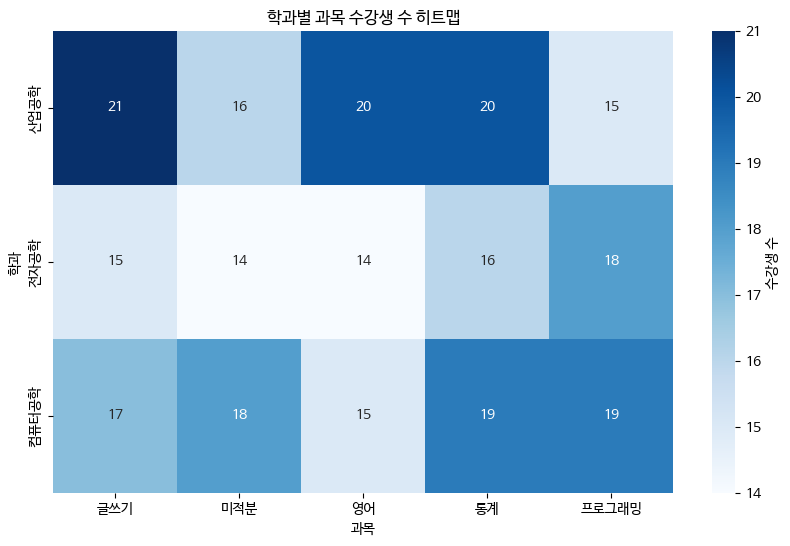

In [79]:
# TODO: 학과별 수강 이력 히트맵 그리기

df_confirm_1 = df_all.copy()

# 각 학생이 해당 과목을 수강했는지 여부는 총점이 NaN이 아닌지 여부로 판단하면 됩니다
for subject in ['글쓰기', '미적분', '영어', '통계', '프로그래밍']:
    df_confirm_1[subject] = df_all['과목'].apply(lambda x: 1 if subject in eval(x) else 0)

# 학과별로 각 과목 수강한 학생 수 계산
# x축은 과목명, y축은 학과명입니다.
heatmap_data = df_confirm_1.groupby('학과')[['글쓰기', '미적분', '영어', '통계', '프로그래밍']].sum()

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': '수강생 수'})

plt.xlabel('과목')
plt.ylabel('학과')
plt.title('학과별 과목 수강생 수 히트맵')
plt.show()

### 4.2. 우수 정도 시각화 (25점)

#### 4.2.1. `우수과목수` column 만들기 (5점)
- 각 학생에 대해 상위 50% 안에 든 과목의 수가 몇개인지 구하여 `df_all`에 `우수과목수` column을 추가하세요.
- 형식은 다음과 같은 문자열로 표기합니다.
  - `우수과목수` = "(상위 50% 안에 든 과목의 수)/(전체 과목의 수)"
  - 예시) 3과목을 수강한 학생의 경우, 2과목이 상위 50% 안에 들면 `우수과목수` = "2/3"
- 참고
  - 총점에 해당하는 column들만 모아 각 과목에 대한 중앙값을 구한 뒤, 이를 총점과 비교하면 됩니다.
  - 중앙값은 `median()` 함수를 이용하면 됩니다.
  - 해당 학생이 수강한 과목의 수는 '과목' column의 길이로 구하거나, 총점에서 NaN이 아닌 항목의 수로 구하면 됩니다.

In [80]:
# TODO: 우수과목수 column 만들기
score_columns = [col for col in df_all.columns if '총점' in col]
# 중앙값은 median() 함수를 이용
median_scores = df_all[score_columns].median()

In [81]:
# 수강 과목 찾기
def count_enrolled_subjects(row):
    subject_columns = ['글쓰기_총점', '미적분_총점', '영어_총점', '통계_총점', '프로그래밍_총점']
    enrolled_subjects = sum(row[col] > 0 for col in subject_columns)
    return enrolled_subjects
# 3과목을 수강한 학생의 경우
df_all['수강한_과목_수'] = df_all.apply(count_enrolled_subjects, axis=1)
# 각 학생에 대해 상위 50%
df_all['상위_50%_안에_든_과목의_수'] = df_all[score_columns].apply(lambda row: f"{(row > median_scores).sum()}", axis =1)
# 우수과목수 생성하기
df_all['우수과목수'] = df_all['상위_50%_안에_든_과목의_수'].astype(str) + '/' + df_all['수강한_과목_수'].astype(str)
# 숫자 형태로 바꾸기
df_all['우수과목수'] = df_all['우수과목수'].apply(lambda x: str(Fraction(x).limit_denominator()))

df_all.head(1)

,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,프로그래밍_과제3(10),프로그래밍_출석(10),글쓰기_총점,미적분_총점,영어_총점,통계_총점,프로그래밍_총점,수강한_과목_수,상위_50%_안에_든_과목의_수,우수과목수
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남,21.92,21.43,33.06,6.0,...,5.51,9.0,81.53,59.06,77.12,49.44,79.95,5,3,3/5


In [82]:
# 사용하고 버리기
df_all = df_all.drop(columns = ['수강한_과목_수','상위_50%_안에_든_과목의_수'])

In [83]:
# !!! 수정 금지 !!!
df_all.head()

,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,프로그래밍_과제1(10),프로그래밍_과제2(10),프로그래밍_과제3(10),프로그래밍_출석(10),글쓰기_총점,미적분_총점,영어_총점,통계_총점,프로그래밍_총점,우수과목수
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남,21.92,21.43,33.06,6.0,...,8.73,6.44,5.51,9.0,81.53,59.06,77.12,49.44,79.95,3/5
1,C,3,전자공학,"['미적분', '프로그래밍', '통계']",id_001,여,NaN,NaN,NaN,NaN,...,7.05,8.08,6.43,10.0,74.26,79.23,66.62,74.03,87.69,4/5
2,C,3,산업공학,"['글쓰기', '영어', '미적분', '통계']",id_002,남,15.81,18.83,28.31,10.0,...,NaN,NaN,NaN,NaN,59.77,70.13,89.26,42.60,66.35,3/5
3,B,1,전자공학,"['미적분', '글쓰기', '영어', '프로그래밍', '통계']",id_003,여,18.32,29.25,24.96,9.0,...,7.79,4.34,4.88,9.0,51.24,60.35,87.03,76.90,55.42,2/5
4,C,1,전자공학,"['미적분', '프로그래밍', '영어', '통계']",id_004,여,NaN,NaN,NaN,NaN,...,9.62,5.05,7.25,10.0,75.74,58.71,65.16,69.83,83.77,3/5


#### 4.2.2. `성취도` column 만들기 (5점)
- `성취도` column을 추가하고 '우수', '보통', '주의'로 나누어 표기하세요.
- 각각은 아래와 같은 기준으로 나눕니다.
  - '우수': 우수과목수가 2/3 이상인 경우
  - '보통': 우수과목수가 1/3 이상인 경우
  - '주의': 그 외 (우수과목수가 1/3 미만인 경우)

In [84]:
# TODO: `성취도` column 만들기

df_all['성취도'] = df_all['우수과목수'].apply(lambda x: '우수' if eval(x) >= 2/3 else '보통' if eval(x) >= 1/3 else '주의')
df_all.head()

,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,프로그래밍_과제2(10),프로그래밍_과제3(10),프로그래밍_출석(10),글쓰기_총점,미적분_총점,영어_총점,통계_총점,프로그래밍_총점,우수과목수,성취도
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남,21.92,21.43,33.06,6.0,...,6.44,5.51,9.0,81.53,59.06,77.12,49.44,79.95,3/5,보통
1,C,3,전자공학,"['미적분', '프로그래밍', '통계']",id_001,여,NaN,NaN,NaN,NaN,...,8.08,6.43,10.0,74.26,79.23,66.62,74.03,87.69,4/5,우수
2,C,3,산업공학,"['글쓰기', '영어', '미적분', '통계']",id_002,남,15.81,18.83,28.31,10.0,...,NaN,NaN,NaN,59.77,70.13,89.26,42.60,66.35,3/5,보통
3,B,1,전자공학,"['미적분', '글쓰기', '영어', '프로그래밍', '통계']",id_003,여,18.32,29.25,24.96,9.0,...,4.34,4.88,9.0,51.24,60.35,87.03,76.90,55.42,2/5,보통
4,C,1,전자공학,"['미적분', '프로그래밍', '영어', '통계']",id_004,여,NaN,NaN,NaN,NaN,...,5.05,7.25,10.0,75.74,58.71,65.16,69.83,83.77,3/5,보통


In [85]:
# !!! 수정 금지 !!!

df_all.head()

,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,프로그래밍_과제2(10),프로그래밍_과제3(10),프로그래밍_출석(10),글쓰기_총점,미적분_총점,영어_총점,통계_총점,프로그래밍_총점,우수과목수,성취도
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남,21.92,21.43,33.06,6.0,...,6.44,5.51,9.0,81.53,59.06,77.12,49.44,79.95,3/5,보통
1,C,3,전자공학,"['미적분', '프로그래밍', '통계']",id_001,여,NaN,NaN,NaN,NaN,...,8.08,6.43,10.0,74.26,79.23,66.62,74.03,87.69,4/5,우수
2,C,3,산업공학,"['글쓰기', '영어', '미적분', '통계']",id_002,남,15.81,18.83,28.31,10.0,...,NaN,NaN,NaN,59.77,70.13,89.26,42.60,66.35,3/5,보통
3,B,1,전자공학,"['미적분', '글쓰기', '영어', '프로그래밍', '통계']",id_003,여,18.32,29.25,24.96,9.0,...,4.34,4.88,9.0,51.24,60.35,87.03,76.90,55.42,2/5,보통
4,C,1,전자공학,"['미적분', '프로그래밍', '영어', '통계']",id_004,여,NaN,NaN,NaN,NaN,...,5.05,7.25,10.0,75.74,58.71,65.16,69.83,83.77,3/5,보통


#### 4.2.3. `성취도` 시각화 (15점)
- `성취도` column을 이용하여 학교별, 학과별, 학년별로 성취도를 시각화하세요.
- 이 때, 시각화 방식으로는 누적막대그래프를 이용합니다.
- 참고
  - 누적막대그래프를 바로 그리려고 하면 어려울 수 있습니다.
    - `df.groupby().size()`를 이용하여 '우수', '보통', '주의' 학생의 수를 카운트할 수 있습니다.
    - 이를 `df.pivot()` 또는 `df.pivot_table()` 함수를 이용하면 보기 좋은 형태로 데이터를 만들 수 있습니다.
  - 수업에서 다루지 않았지만 DataFrame.plot() 함수를 이용하면 쉽게 누적막대그래프를 그릴 수 있습니다. [(참고)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
- 주의
  - 누적막대그래프를 그리기에 실패한 경우, 다른 시각화 방식을 이용하여 성취도를 시각화하시면 3점을 드립니다.

In [86]:
df_all.groupby('성취도').size()

성취도
보통    45
우수     6
주의    11
dtype: int64

In [89]:
# 학교,학과,학년별로 그룹바이
coll_group = df_all.groupby(['학교', '성취도']).size().unstack(fill_value=0)
major_group = df_all.groupby(['학과', '성취도']).size().unstack(fill_value=0)
grade_group = df_all.groupby(['학년', '성취도']).size().unstack(fill_value=0)

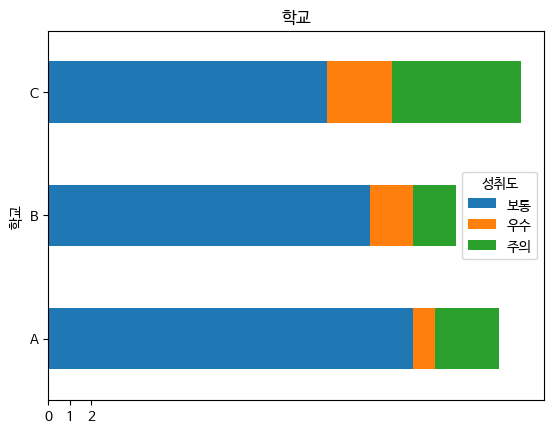

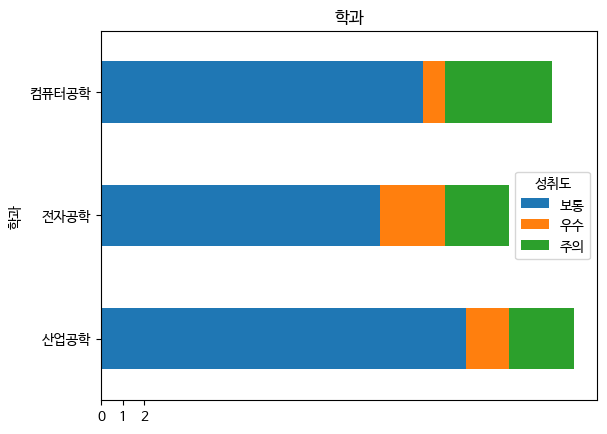

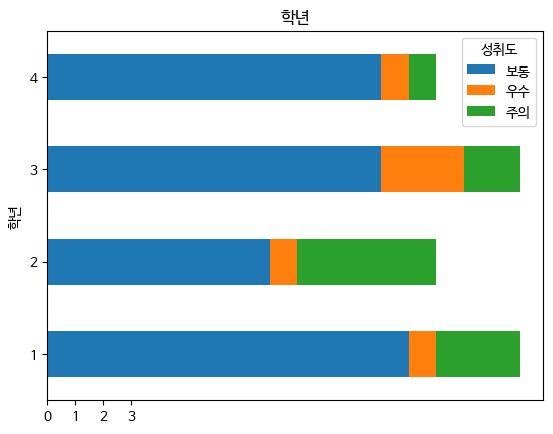

In [92]:

# 학교
ax = coll_group.plot(kind='barh', stacked=True)
plt.title('학교')

# x 축 레이블 설정
plt.xticks(range(len(coll_group.index)))

plt.legend(title='성취도')
plt.show()

# 학과
ax = major_group.plot(kind='barh', stacked=True)
plt.title('학과')

# x 축 레이블 설정
plt.xticks(range(len(major_group.index)))

plt.legend(title='성취도')
plt.show()

# 학년
ax = grade_group.plot(kind='barh', stacked=True)
plt.title('학년')

# x 축 레이블 설정
plt.xticks(range(len(grade_group.index)))

plt.legend(title='성취도')
plt.show()